# Dagstuhl ChoirSet: F0 Estimation Demo

### Table of contents

1. [DCS Content Parser](#one)
2. [Some remarks about the f0estimation script](#two)
3. [Extracting F0-trajectories using pYIN](#three)
4. [Extracting F0-trajectories using CREPE](#four)


### 1. DCS Content Parser<a class="anchor" id="one"></a>

We first use the `DCS_content_parser` function to retrieve the path to the audio files we want to extract the F0-trajectories from. In this example we will extract F0-trajectories from the three close-up microphones of the second alto (A2) singing the third take of _Locus Iste_ with Quartet B.

In [63]:
import DCStoolbox as dcst

import os

# Settings
DCS_path = '/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/'
song_id = 'DCS_LI'
setting = 'QuartetB'
take = 'Take03'
part = 'A2'
mic = '*'

DCS_table = dcst.DCS_content_parser(DCS_path, song_id, setting, take, part, mic)
DCS_table


,Dataset-ID,Song-ID,Setting,Take,Section,Microphone,Audio,Beat,ScoreRepr,F0CREPE,F0PYIN
0,DCS,LI,QuartetB,Take03,A2,DYN,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...,,,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...
1,DCS,LI,QuartetB,Take03,A2,HSM,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...,,,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...
2,DCS,LI,QuartetB,Take03,A2,LRX,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...,,,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...,/media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1...


### 2. Some remarks about the `f0estimation` script <a class="anchor" id="two"></a>

The `f0estimation.py` script is part of the toolbox and can be used to automatically extract F0-trajectories from monophonic audio signals using either pYIN (Mauch and Dixon (2014)) or CREPE (Kim et al. (2018)) algorithms. This script can be called either from the **command-line** or inside **Python**. In this demo notebook we use the latter; however, let us briefly describe the procedure using the command-line functionality. 

#### Calling `f0estimation.py` from the command-line

``python3 f0estimation.py ---input_parameters_here---``

The input paramaters are as follows:
* **--method**: pYIN/crepe
* **--mode**: 1 (extract the F0-trajectory of a single audio file) / 2 (extract the F0-trajectories of all audio files inside a folder
* **--folder**: path to the folder with the audio file(s)
* **--audio_file**: if _mode=1_, this should be the filename of the audio to process

The algorithm will create a new folder (called either "pYIN" or "CREPE" depending on the chosen method") in the same directory of the input audio files and store the resulting F0-trajectories as CSV files. For details about the format, please refer to the paper that this toolbox accompanies.

#### Using `f0estimation.py` inside Python
In the following cells we provide examples on how to use the script.

### 3. Extracting F0-trajectories using pYIN <a class="anchor" id="three"></a>

We use the paths extracted in the previous section and use the script `f0estimation.py` from the toolbox to extract the F0-trajectories using pYIN. We do it for each of the selected audio files. Note that besides outputting the F0-trajectories, they are also stored as CSV files (see Section 2).

DCS_LI_QuartetB_Take03_A2_DYN.wav F0 curve saved to /media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/audio_wav_22050_mono/pYIN/DCS_LI_QuartetB_Take03_A2_DYN.csv


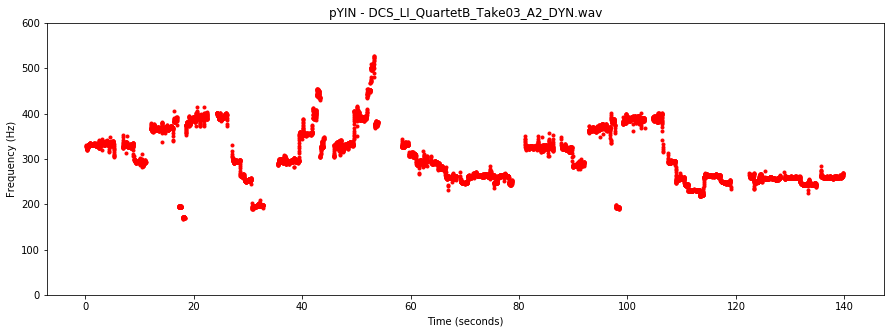

DCS_LI_QuartetB_Take03_A2_HSM.wav F0 curve saved to /media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/audio_wav_22050_mono/pYIN/DCS_LI_QuartetB_Take03_A2_HSM.csv


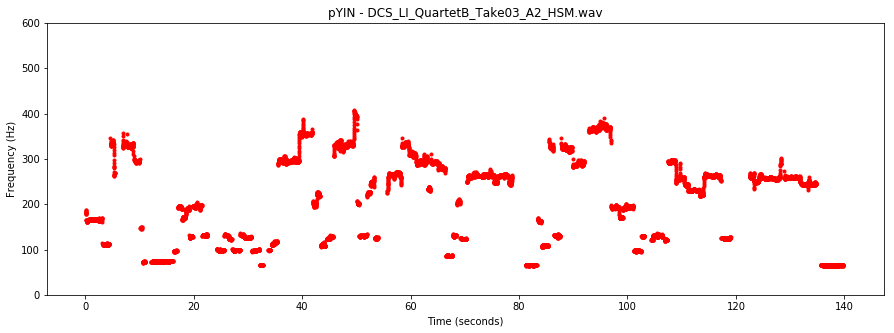

DCS_LI_QuartetB_Take03_A2_LRX.wav F0 curve saved to /media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/audio_wav_22050_mono/pYIN/DCS_LI_QuartetB_Take03_A2_LRX.csv


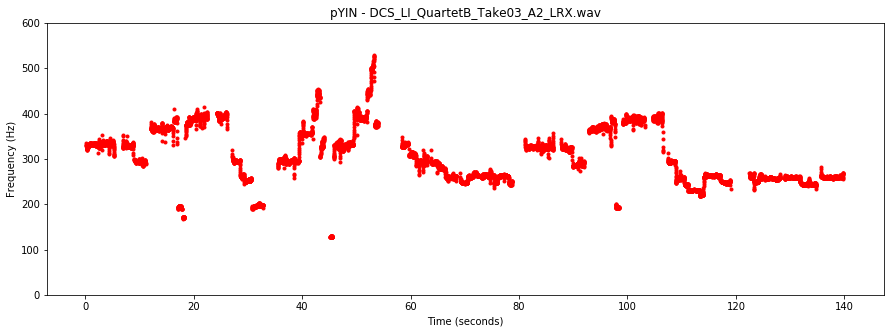

In [64]:
import matplotlib.pyplot as plt


for rw in DCS_table['Audio']:
    
    filename = os.path.basename(rw)
    folder = os.path.dirname(rw)
    
    traj = dcst.f0estimation.extract_F0_pYIN_vamp(folder, filename)
    # traj contains three columns with timestamp in seconds, the pitch in Hz and the confidence
    
    plt.figure(figsize=(15, 5))
    plt.plot(traj[:, 0], traj[:, 1], '.r', markersize=6)
    plt.ylim([0, 600]) # trick to easily skip negative values only for viz purposes
    plt.xlabel('Time (seconds)'), plt.ylabel('Frequency (Hz)'), plt.title('pYIN - ' + filename)
    plt.show()

### 4. Extracting F0-trajectories using CREPE <a class="anchor" id="four"></a>

We follow the same procedure as in Section 3 but in this case we use CREPE to extract the F0-trajectories. Note that CREPE is a deep learning model trained using TensorFlow using GPU. The next cell takes a long time to run if you are not running this on GPU. The CSV files with the extracted F0-trajectories are also stored by default, as in the case of pYIN.

14032/14032 [==============================] - 357s 25ms/step
DCS_LI_QuartetB_Take03_A2_DYN.wav F0 curve saved to /media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/audio_wav_22050_mono/CREPE/DCS_LI_QuartetB_Take03_A2_DYN.csv


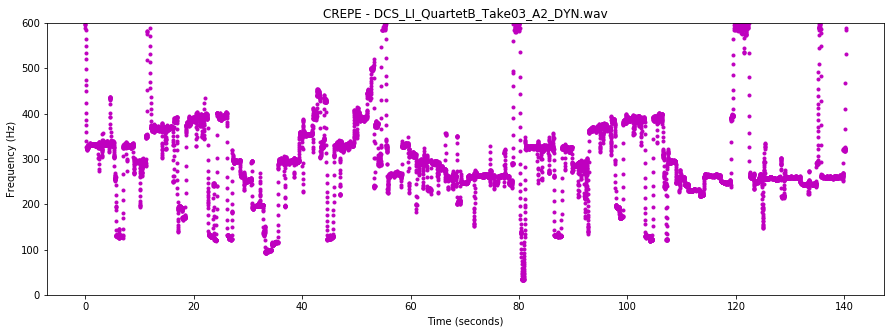

14032/14032 [==============================] - 284s 20ms/step
DCS_LI_QuartetB_Take03_A2_HSM.wav F0 curve saved to /media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/audio_wav_22050_mono/CREPE/DCS_LI_QuartetB_Take03_A2_HSM.csv


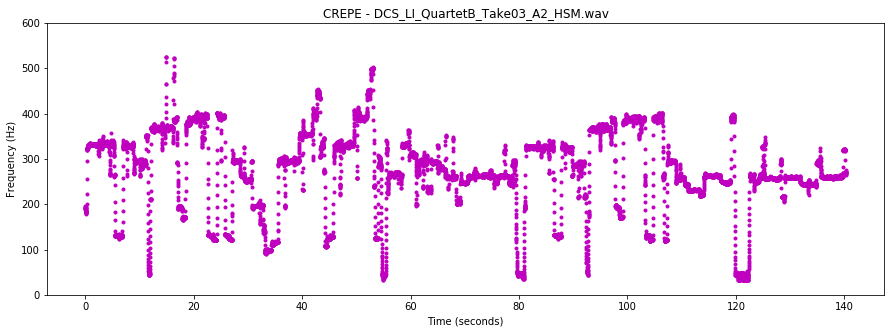

14032/14032 [==============================] - 296s 21ms/step
DCS_LI_QuartetB_Take03_A2_LRX.wav F0 curve saved to /media/helenacuesta/MTGMIR/DagstuhlChoirSet_V1.0/DagstuhlChoirSet_V1.0/audio_wav_22050_mono/CREPE/DCS_LI_QuartetB_Take03_A2_LRX.csv


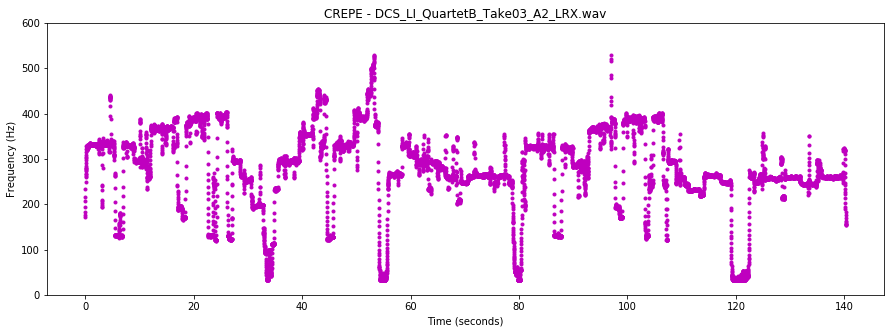

In [65]:
import matplotlib.pyplot as plt


for rw in DCS_table['Audio']:
    
    filename = os.path.basename(rw)
    folder = os.path.dirname(rw)
    
    traj = dcst.f0estimation.extract_F0_CREPE(folder, filename)
    # traj contains three columns with timestamp in seconds, the pitch in Hz and the confidence
    
    plt.figure(figsize=(15, 5))
    plt.plot(traj[:, 0], traj[:, 1], '.m', markersize=6)
    plt.ylim([0, 600]) # trick to easily skip negative values only for viz purposes
    plt.xlabel('Time (seconds)'), plt.ylabel('Frequency (Hz)'), plt.title('CREPE - ' + filename)
    plt.show()